## Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("./data/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Converting data into NumPy array and shuffle them

In [4]:
data = np.array(data)
np.random.shuffle(data)
m,n = data.shape
print(m,n)

42000 785


## Split Dataset into train and test

In [23]:
# Testing Dataset

data_test = data[0:1000].T # Split the dataset from 0 to 1000 and transpose it
Y_test = data_test[0]
X_test = data_test[1:n]

# Training Dataset

data_train = data[1000:m].T # Split the dataset from 1000 to end and transpose it
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255. # Divide each pixel value from 255 to get value between 0 and 1
_,m_train = X_train.shape

In [24]:
Y_train

array([4, 1, 3, ..., 7, 1, 6])

# Forward Propagation

In [32]:
def init_params():

    # Weight and biases initialization with Xaviers initialization for better accuracy
    W1 = np.random.normal(size=(16,784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(16,1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10,16)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10,1)) * np.sqrt(1./(784))

    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    Z -= np.max(Z,axis=0)
    A = np.exp(Z)/np.sum(np.exp(Z),axis=0)
    return A

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2



# Backward Propegation
- one_hot function is used to convert labels into numerical vector (i.e: 3 becomes [0,0,0,1,0,0,0,0,0,0])
- deriv_ReLU is returning derivative of ReLU
- update_prams function is responsible to update weights and biases of each layers regarding to the gradients (alpha means the learning rate)

In [33]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hotY = one_hot(Y)
    dZ2 = A2 - one_hotY # Loss of output layer
    dW2 = 1 / m * dZ2.dot(A1.T) # gradient of output layer weights
    db2 = 1 / m * np.sum(dZ2) # gradient of output layer biases
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1) # Loss of hidden layer
    dW1 = 1/m * dZ1.dot(X.T) # gradient of hidden layer weights
    db1 = 1/m * np.sum(dZ1) # gradient of hidden layer biases
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

# Model Training

In [34]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2 = init_params()
    
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        
        if i % 10 == 0:
            print(f'Iterartions - {i}')
            predictions = get_predictions(A2)
            print(get_accuracy(predictions,Y))
    
    return W1,b1,W2,b2

In [35]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.10,500)

Iterartions - 0
[2 0 0 ... 5 0 5] [4 1 3 ... 7 1 6]
0.09636585365853659
Iterartions - 10
[9 1 1 ... 0 1 0] [4 1 3 ... 7 1 6]
0.3083170731707317
Iterartions - 20
[9 1 1 ... 0 1 6] [4 1 3 ... 7 1 6]
0.38646341463414635
Iterartions - 30
[4 1 1 ... 0 1 6] [4 1 3 ... 7 1 6]
0.5232439024390244
Iterartions - 40
[4 1 3 ... 7 1 6] [4 1 3 ... 7 1 6]
0.6443414634146342
Iterartions - 50
[4 1 7 ... 7 1 6] [4 1 3 ... 7 1 6]
0.7262682926829268
Iterartions - 60
[4 1 7 ... 7 1 6] [4 1 3 ... 7 1 6]
0.7701951219512195
Iterartions - 70
[4 1 7 ... 7 1 6] [4 1 3 ... 7 1 6]
0.7957317073170732
Iterartions - 80
[4 1 7 ... 7 1 6] [4 1 3 ... 7 1 6]
0.8129024390243902
Iterartions - 90
[4 1 7 ... 7 1 6] [4 1 3 ... 7 1 6]
0.8261219512195122
Iterartions - 100
[4 1 7 ... 7 1 6] [4 1 3 ... 7 1 6]
0.8362926829268292
Iterartions - 110
[4 1 7 ... 7 1 6] [4 1 3 ... 7 1 6]
0.8457560975609756
Iterartions - 120
[4 1 7 ... 7 1 6] [4 1 3 ... 7 1 6]
0.8526829268292683
Iterartions - 130
[4 1 7 ... 7 1 6] [4 1 3 ... 7 1 6]
0.8582

# Model testing

In [42]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index,W1,b1,W2,b2):
    current_image = X_train[:,index, None]
    prediction = make_predictions(X_train[:,index,None],W1,b1,W2,b2)
    
    label = Y_train[index]
    print("Prediction: ",prediction)
    print("Label: ",label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


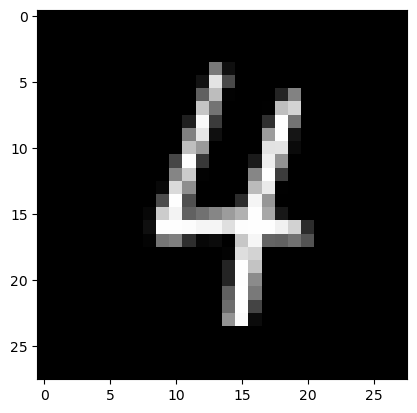

Prediction:  [1]
Label:  1


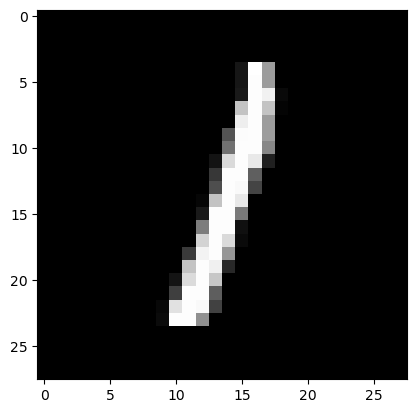

Prediction:  [7]
Label:  7


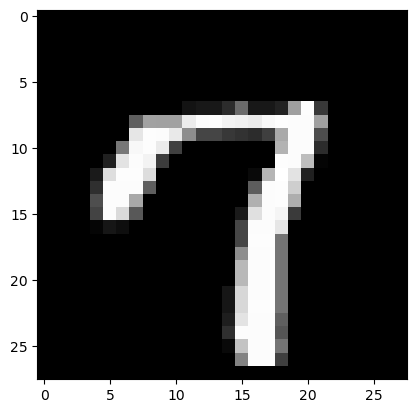

Prediction:  [5]
Label:  5


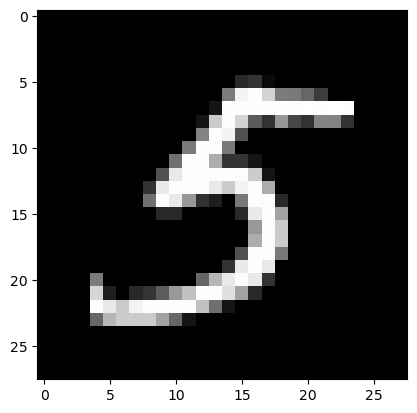

In [43]:
test_prediction(0,W1,b1,W2,b2)
test_prediction(10,W1,b1,W2,b2)
test_prediction(3,W1,b1,W2,b2)
test_prediction(5,W1,b1,W2,b2)